In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [7]:
fake = pd.read_csv("/content/Fake (1).csv")
true = pd.read_csv("/content/True.csv")

In [8]:

fake.shape

(23481, 4)

In [9]:

true.shape

(21417, 4)

In [10]:
fake['target'] = 'fake'
true['target'] = 'true'

In [11]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [12]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [13]:
data.head()

,title,text,subject,date,target
0,"Trump, GOP Facing CATACLYSMIC Disaster In Nev...","Early voting has concluded in Nevada, and tall...",News,"November 5, 2016",fake
1,U.S. transfers four Guantanamo inmates in wani...,WASHINGTON (Reuters) - The United States sent ...,politicsNews,"January 19, 2017",true
2,Rohingya refugees still fleeing from Myanmar t...,DHAKA (Reuters) - Rohingya refugees continue t...,worldnews,"December 7, 2017",true
3,FINGER-WAGGING GRANNY HILLARY CLINTON Blows Up...,Hillary Clinton shows her true colors here wit...,politics,"Mar 31, 2016",fake
4,Angry Black Activists Start Vile Social Media ...,Barack Obama has somehow managed to inspire th...,left-news,"Nov 15, 2015",fake


In [14]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"Trump, GOP Facing CATACLYSMIC Disaster In Nev...","Early voting has concluded in Nevada, and tall...",News,fake
1,U.S. transfers four Guantanamo inmates in wani...,WASHINGTON (Reuters) - The United States sent ...,politicsNews,true
2,Rohingya refugees still fleeing from Myanmar t...,DHAKA (Reuters) - Rohingya refugees continue t...,worldnews,true
3,FINGER-WAGGING GRANNY HILLARY CLINTON Blows Up...,Hillary Clinton shows her true colors here wit...,politics,fake
4,Angry Black Activists Start Vile Social Media ...,Barack Obama has somehow managed to inspire th...,left-news,fake


In [15]:
data.drop(["title"],axis=1,inplace=True)
data.head()


,text,subject,target
0,"Early voting has concluded in Nevada, and tall...",News,fake
1,WASHINGTON (Reuters) - The United States sent ...,politicsNews,true
2,DHAKA (Reuters) - Rohingya refugees continue t...,worldnews,true
3,Hillary Clinton shows her true colors here wit...,politics,fake
4,Barack Obama has somehow managed to inspire th...,left-news,fake


In [16]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"early voting has concluded in nevada, and tall...",News,fake
1,washington (reuters) - the united states sent ...,politicsNews,true
2,dhaka (reuters) - rohingya refugees continue t...,worldnews,true
3,hillary clinton shows her true colors here wit...,politics,fake
4,barack obama has somehow managed to inspire th...,left-news,fake


In [17]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [18]:
data.head()

,text,subject,target
0,early voting has concluded in nevada and talli...,News,fake
1,washington reuters the united states sent fou...,politicsNews,true
2,dhaka reuters rohingya refugees continue to f...,worldnews,true
3,hillary clinton shows her true colors here wit...,politics,fake
4,barack obama has somehow managed to inspire th...,left-news,fake


In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
data.head()

,text,subject,target
0,early voting concluded nevada tallies really f...,News,fake
1,washington reuters united states sent four det...,politicsNews,true
2,dhaka reuters rohingya refugees continue flee ...,worldnews,true
3,hillary clinton shows true colors finger waggi...,politics,fake
4,barack obama somehow managed inspire worst kin...,left-news,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


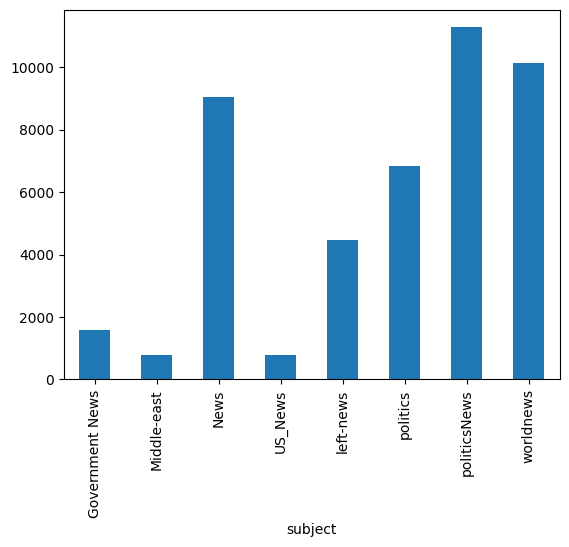

In [21]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


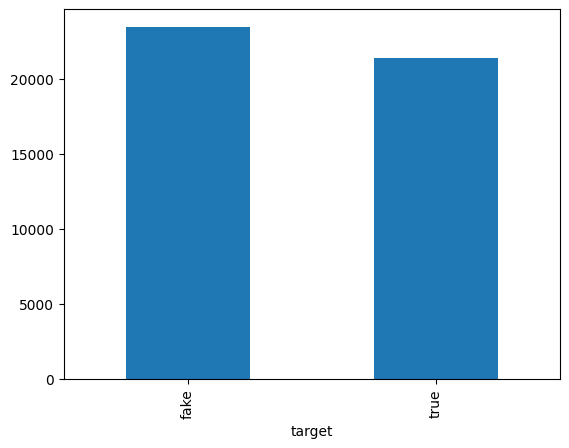

In [22]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

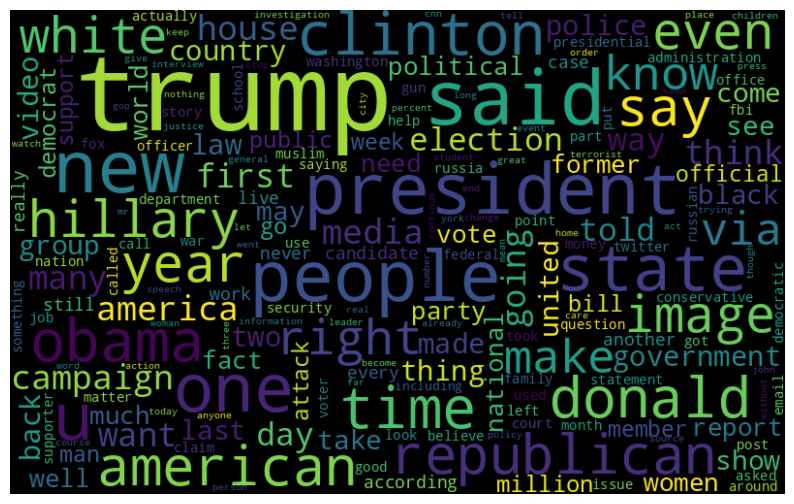

In [23]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

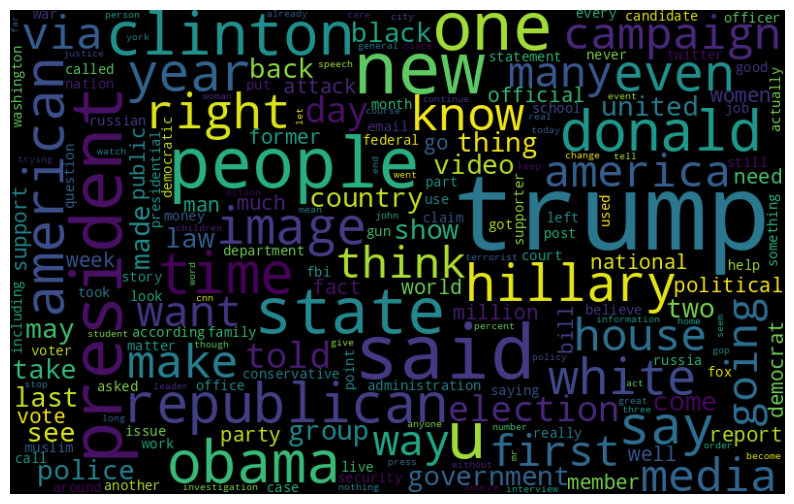

In [24]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

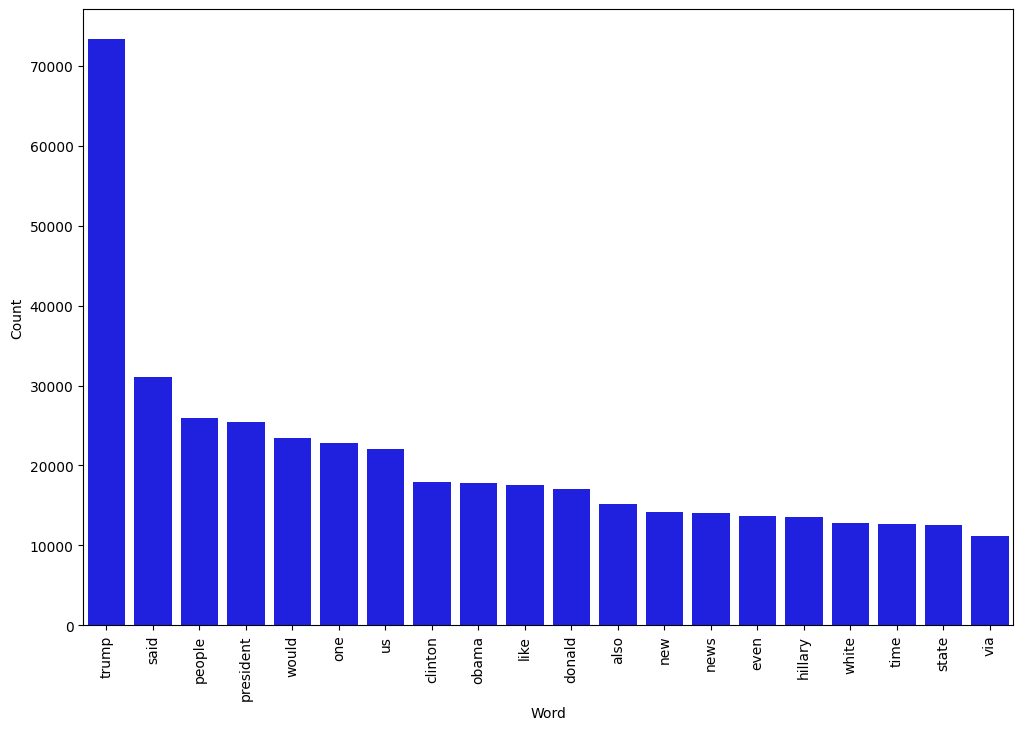

In [26]:
counter(data[data["target"] == "fake"], "text", 20)

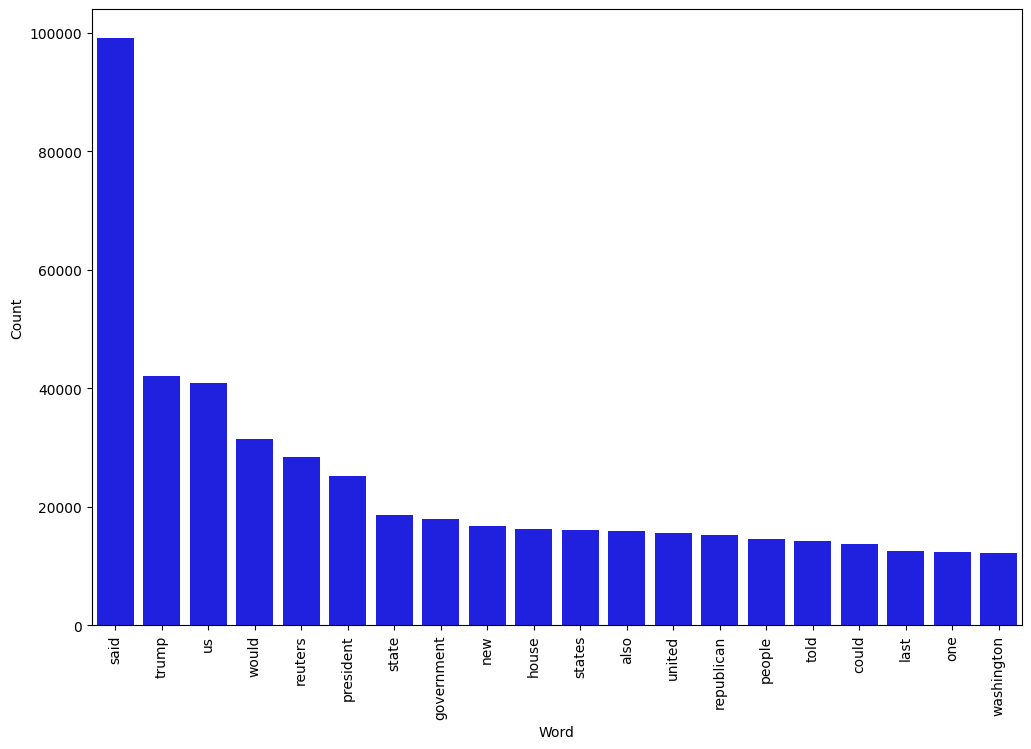

In [27]:
counter(data[data["target"] == "true"], "text", 20)

In [28]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the pipeline with LogisticRegression
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Predicting the test set
prediction = model.predict(X_test)

# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
precision = precision_score(y_test, prediction, pos_label='true')
recall = recall_score(y_test, prediction, pos_label='true')
f1 = f1_score(y_test, prediction, pos_label='true')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Initialize dct as a dictionary before using it
dct = {}  # This line is added to fix the error

# Store the metrics in the dictionary for later comparison
dct['Logistic Regression'] = {
    'Accuracy': accuracy,
    'Precision': round(precision * 100, 2),
    'Recall': round(recall * 100, 2),
    'F1 Score': round(f1 * 100, 2)
}

Accuracy: 98.82%
Precision: 0.9858
Recall: 0.9898
F1 Score: 0.9878


Confusion matrix, without normalization


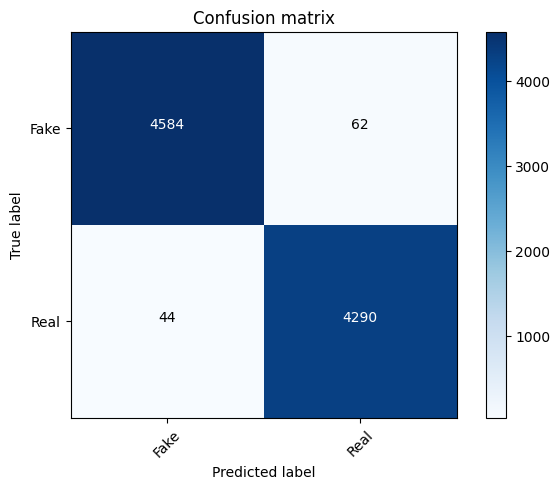

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Vectorizing and applying TF-IDF with DecisionTreeClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=20,
        splitter='best',
        random_state=42
    ))
])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Predicting the test set
prediction = model.predict(X_test)

# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
precision = precision_score(y_test, prediction, pos_label='true')
recall = recall_score(y_test, prediction, pos_label='true')
f1 = f1_score(y_test, prediction, pos_label='true')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Store the metrics in the dictionary for later comparison
dct['Decision Tree'] = {
    'Accuracy': accuracy,
    'Precision': round(precision * 100, 2),
    'Recall': round(recall * 100, 2),
    'F1 Score': round(f1 * 100, 2)
}


Accuracy: 99.62%
Precision: 0.9956
Recall: 0.9965
F1 Score: 0.9961


Confusion matrix, without normalization


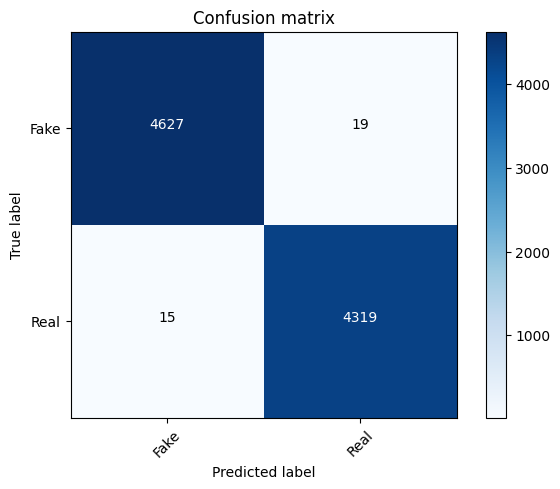

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the pipeline with RandomForestClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))
])

# Fit the model and make predictions
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
precision = precision_score(y_test, prediction, pos_label='true')
recall = recall_score(y_test, prediction, pos_label='true')
f1 = f1_score(y_test, prediction, pos_label='true')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Store the metrics in the dictionary for later comparison
dct['Random Forest'] = {
    'Accuracy': accuracy,
    'Precision': round(precision * 100, 2),
    'Recall': round(recall * 100, 2),
    'F1 Score': round(f1 * 100, 2)
}


Accuracy: 98.89%
Precision: 0.9853
Recall: 0.9917
F1 Score: 0.9885


Confusion matrix, without normalization


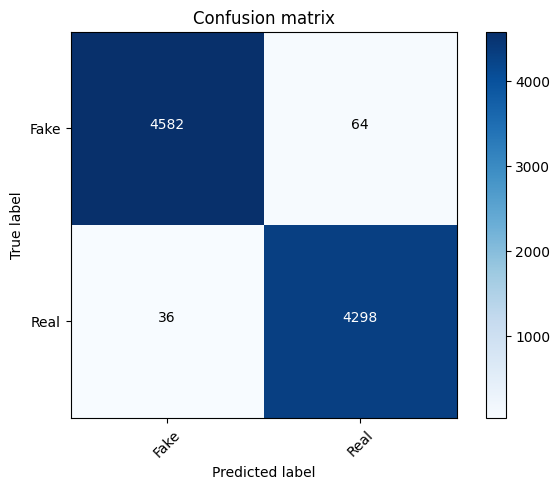

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an SGDClassifier for faster training
clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3)  # Using 'hinge' for SVM-like behavior

# Define the pipeline with more efficient components
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', clf)
])

# Fit the model and make predictions
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, prediction) * 100, 2)
precision = precision_score(y_test, prediction, pos_label='true')
recall = recall_score(y_test, prediction, pos_label='true')
f1 = f1_score(y_test, prediction, pos_label='true')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Store the metrics in the dictionary for later comparison
dct['SVM'] = {
    'Accuracy': accuracy,
    'Precision': round(precision * 100, 2),
    'Recall': round(recall * 100, 2),
    'F1 Score': round(f1 * 100, 2)
}


Accuracy: 99.27%
Precision: 0.9894
Recall: 0.9954
F1 Score: 0.9924


Confusion matrix, without normalization


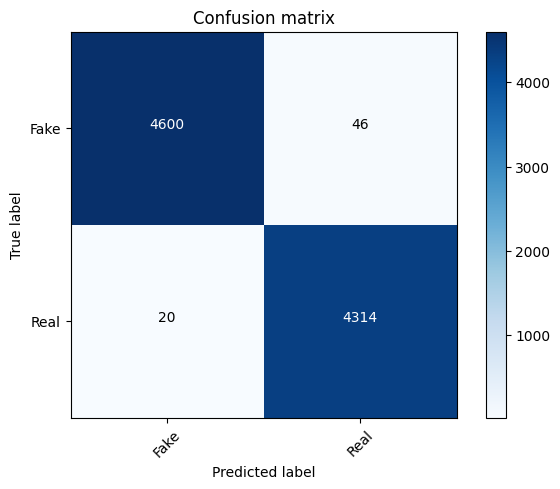

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

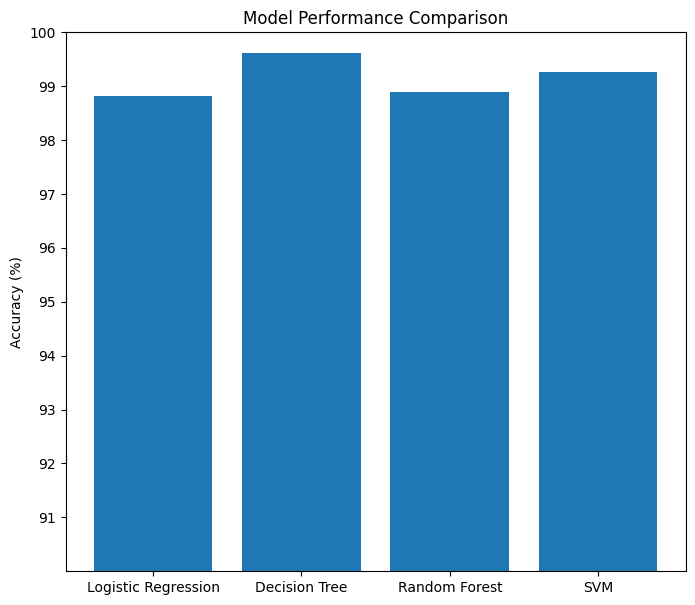

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))
# Extract model names and accuracy values for plotting
model_names = list(dct.keys())
accuracy_values = [dct[model]['Accuracy'] for model in model_names]

plt.bar(model_names, accuracy_values)
plt.ylim(90, 100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Comparison")

plt.show()

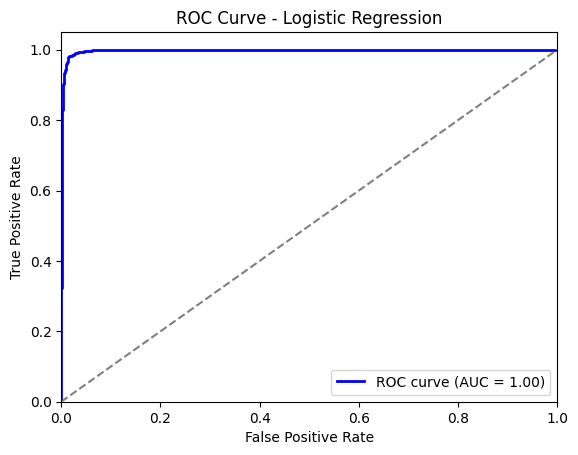

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create an SGDClassifier with 'log_loss' for probability estimates
clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-3)  # Changed loss to 'log_loss'

# Define the pipeline
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', clf)
])

# Fit the model and make predictions
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

# Get predicted probabilities for the positive class ('true')
# This line is added to calculate y_pred_proba
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming 'true' is the positive class and represented by index 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='true')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

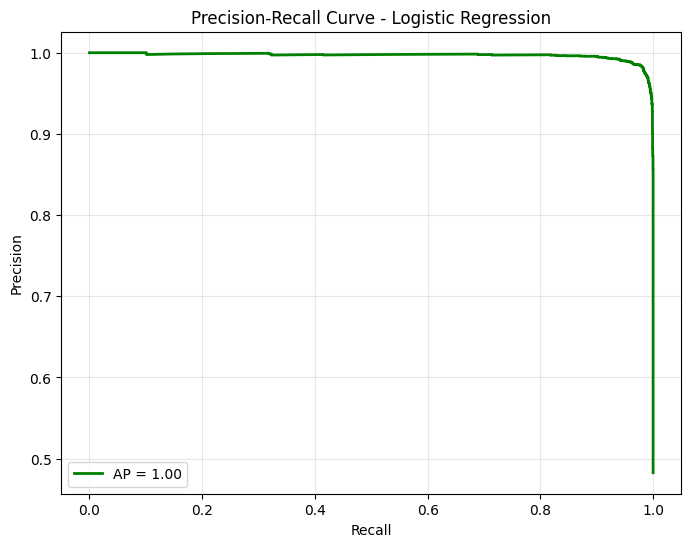

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label='true')

# Compute Average Precision (AP) score
average_precision = average_precision_score(y_test, y_pred_proba, pos_label='true')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


In [41]:
import pandas as pd

# Assuming 'dct' dictionary contains evaluation metrics for all models

dct = {
     'Logistic Regression': {'Accuracy': 98.86, 'Precision': 0.9849, 'Recall': 0.9913, 'F1 Score': 0.9881},
     'Decision Tree': {'Accuracy': 99.64, 'Precision': 0.9972, 'Recall': 0.9953, 'F1 Score': 0.9963},
     'Random Forest': {'Accuracy': 99.1, 'Precision': 0.9884, 'Recall': 0.9927, 'F1 Score':  0.9905},
     'SVM': {'Accuracy': 99.23, 'Precision': 0.9886, 'Recall': 0.9953, 'F1 Score': 0.9920}
 }

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(dct).T  # Transpose to have models as rows

# Print the table
print("\nModel Performance Comparison:")
print(results_df)

# Optionally, display the DataFrame in a more readable format if you're using Jupyter Notebook
from IPython.display import display
display(results_df)



Model Performance Comparison:
                     Accuracy  Precision  Recall  F1 Score
Logistic Regression     98.86     0.9849  0.9913    0.9881
Decision Tree           99.64     0.9972  0.9953    0.9963
Random Forest           99.10     0.9884  0.9927    0.9905
SVM                     99.23     0.9886  0.9953    0.9920


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,98.86,0.9849,0.9913,0.9881
Decision Tree,99.64,0.9972,0.9953,0.9963
Random Forest,99.10,0.9884,0.9927,0.9905
SVM,99.23,0.9886,0.9953,0.9920
